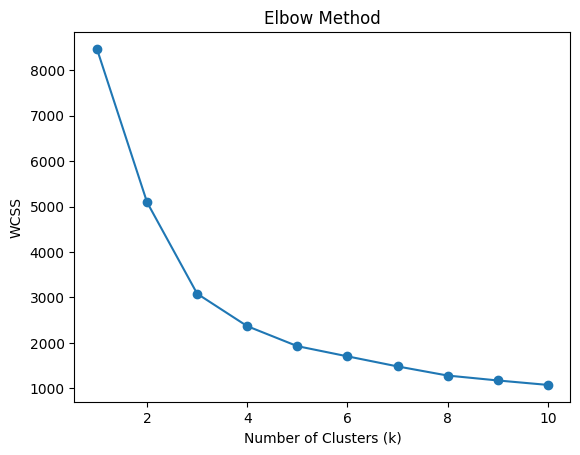

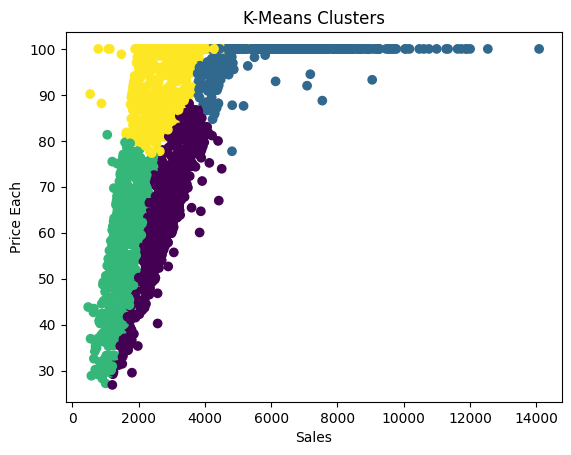

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv(
    "S:/Sameet Patil - SEM 7/LP3/codes/sales_data_sample.csv", encoding="latin1"
)

# 2. Select numerical features
X = df[["QUANTITYORDERED", "SALES", "PRICEEACH"]]

# 3. Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Elbow Method
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

# 5. Fit K-Means with chosen k (example: k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = labels

# 6. Plot final clusters (2D scatter)
plt.scatter(df["SALES"], df["PRICEEACH"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Sales")
plt.ylabel("Price Each")
plt.title("K-Means Clusters")
plt.show()